### unit8 인구 구조를 다양한 형태로 시각화하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

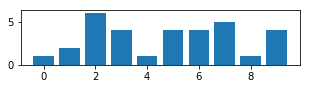

In [2]:
#막대그래프 (X,Y)
plt.figure(figsize=(5,1))
plt.bar(np.arange(10), np.random.randint(1,10,size=10))

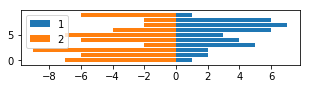

In [4]:
plt.figure(figsize=(5,1))
plt.barh(np.arange(10), np.random.randint(1,10,size=10),label='1') # bar horizontal
plt.barh(np.arange(10), -np.random.randint(1,10,size=10), label='2') # bar horizontal
plt.legend()

In [134]:
#p115
df = pd.read_csv('gendor.csv', encoding='cp949')
df = df.replace(',','',regex=True)
df.shape

(11, 207)

In [135]:
df.head(1)

,행정구역,2019년05월_남_총인구수,2019년05월_남_연령구간인구수,2019년05월_남_0세,2019년05월_남_1세,2019년05월_남_2세,2019년05월_남_3세,2019년05월_남_4세,2019년05월_남_5세,2019년05월_남_6세,...,2019년05월_여_91세,2019년05월_여_92세,2019년05월_여_93세,2019년05월_여_94세,2019년05월_여_95세,2019년05월_여_96세,2019년05월_여_97세,2019년05월_여_98세,2019년05월_여_99세,2019년05월_여_100세 이상
0,부산광역시 수영구 (2650000000),83422,83422,411,494,524,590,545,586,603,...,125,91,70,43,36,28,16,11,7,49


- 특정 도시의 여성과 남성의 나이별 인구수 대조
- 컬럼 위치 찾기 : 남 0세 ~ 남 90세, 여 0세 ~ 여 90세
- 0세 : 10명 1세 : 20명 .... 도시에서 모두 누적 > 막대 그래프로 표현

In [136]:
'a' in 'abc', 'x' in 'abc'

(True, False)

In [163]:
max_age=90
city = '부산광역시 수영구 민락동'
man_0 = '2019년05월_남_0세'
woman_0= '2019년05월_여_0세'
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns[man_0_index], columns[man_0_index + max_age], columns[woman_0_index], columns[woman_0_index + max_age]



('2019년05월_남_0세', '2019년05월_남_90세', '2019년05월_여_0세', '2019년05월_여_90세')

In [164]:
data=np.array(df)

In [165]:
area=data[:,0]
area[:3]

array(['부산광역시 수영구 (2650000000)', '부산광역시 수영구 남천제1동(2650066000)',
       '부산광역시 수영구 남천제2동(2650067000)'], dtype=object)

In [166]:
city_row_index=-1
for i in range(len(area)):
    if city in  area[i] :
        print(i, area[i])
        city_row_index=i


10 부산광역시 수영구 민락동(2650080000)


In [167]:
data[city_row_index]

array(['부산광역시 수영구 민락동(2650080000)', '13198', '13198', 95, 124, 115, 128,
       105, 116, 111, 97, 98, 79, 87, 78, 74, 63, 105, 86, 96, 93, 127,
       130, 159, '155', '170', '183', '188', '203', '190', '172', '161',
       '181', '155', '164', '166', '177', '196', '220', '233', '259',
       '245', '229', '192', '213', '210', '196', '157', '186', '238',
       '228', '218', '215', '224', '192', '199', '171', '202', '164',
       '232', '210', '236', '230', '249', '240', '222', '198', '239',
       '177', '167', '201', 135, 150, '154', 138, 137, 85, 99, 71, 99,
       103, 66, 59, 56, 42, 49, 35, 26, 17, 13, 7, 10, 7, 8, 3, 2, 1, 2,
       2, 0, 1, 0, 0, 2, '14057', '14057', 88, 108, 127, 123, 112, 112,
       94, 107, 101, 61, 74, 87, 80, 71, 73, 88, 94, 100, 116, 117, 128,
       124, '146', '126', '166', '160', '168', '170', '182', '166', '174',
       '165', '180', '195', '199', '196', '250', '222', '233', '231',
       '179', '179', '173', '171', '197', '205', '225', '196', '250'

In [168]:
city_data=data[city_row_index]
#city_data=data[0]
city_man=city_data[man_0_index:man_0_index + max_age]
city_woman=city_data[woman_0_index:woman_0_index + max_age]
city_man = city_man.astype(np.int)
city_woman = city_woman.astype(np.int)
city_man.shape, city_woman.shape, city_man, city_woman

((90,),
 (90,),
 array([ 95, 124, 115, 128, 105, 116, 111,  97,  98,  79,  87,  78,  74,
         63, 105,  86,  96,  93, 127, 130, 159, 155, 170, 183, 188, 203,
        190, 172, 161, 181, 155, 164, 166, 177, 196, 220, 233, 259, 245,
        229, 192, 213, 210, 196, 157, 186, 238, 228, 218, 215, 224, 192,
        199, 171, 202, 164, 232, 210, 236, 230, 249, 240, 222, 198, 239,
        177, 167, 201, 135, 150, 154, 138, 137,  85,  99,  71,  99, 103,
         66,  59,  56,  42,  49,  35,  26,  17,  13,   7,  10,   7]),
 array([ 88, 108, 127, 123, 112, 112,  94, 107, 101,  61,  74,  87,  80,
         71,  73,  88,  94, 100, 116, 117, 128, 124, 146, 126, 166, 160,
        168, 170, 182, 166, 174, 165, 180, 195, 199, 196, 250, 222, 233,
        231, 179, 179, 173, 171, 197, 205, 225, 196, 250, 239, 239, 235,
        214, 231, 200, 233, 270, 246, 344, 292, 252, 286, 259, 289, 233,
        198, 219, 188, 170, 187, 155, 163, 145,  85, 104, 119, 112, 109,
         95,  89,  82,  67,  52,  56, 

<BarContainer object of 90 artists>

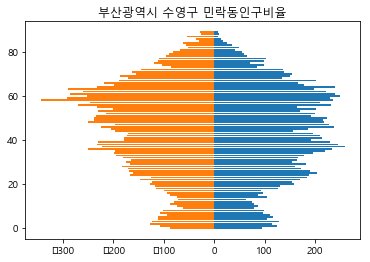

In [169]:
plt.rc('font', family='Malgun Gothic')
plt.title(city + '인구비율')
plt.barh(np.arange(len(city_man)), city_man)
plt.barh(np.arange(len(city_woman)), -city_woman)


In [144]:
city = '광안' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(true만 뽑기)


In [145]:
is_contain=[]
for i in range(len(area)):
    is_contain.append(city in area[i])
np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(4, 207)

In [146]:
city_man = city_data[:,man_0_index:man_0_index+max_age].astype(np.int)
city_woman = city_data[:,woman_0_index:woman_0_index+max_age].astype(np.int)
city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)
city_man.shape, city_woman.shape, city_man, city_woman

((90,),
 (90,),
 array([165, 179, 182, 224, 209, 211, 233, 181, 220, 197, 210, 188, 210,
        180, 249, 263, 218, 261, 293, 312, 309, 373, 404, 496, 542, 566,
        679, 662, 627, 623, 553, 503, 486, 524, 468, 518, 526, 532, 535,
        574, 440, 483, 414, 443, 466, 500, 516, 498, 543, 500, 487, 464,
        407, 443, 421, 419, 460, 466, 474, 508, 508, 490, 495, 466, 496,
        390, 390, 372, 310, 330, 384, 344, 348, 222, 258, 250, 255, 234,
        210, 195, 159, 136, 111, 104,  76,  58,  41,  49,  32,  28]),
 array([150, 188, 183, 200, 182, 154, 205, 183, 191, 161, 194, 184, 185,
        167, 224, 191, 222, 231, 291, 344, 327, 416, 491, 568, 648, 709,
        769, 713, 672, 628, 574, 482, 530, 518, 448, 506, 552, 591, 593,
        531, 519, 482, 450, 458, 482, 560, 545, 575, 563, 525, 561, 527,
        492, 480, 528, 488, 603, 612, 685, 646, 633, 598, 581, 550, 610,
        499, 503, 493, 368, 437, 435, 446, 380, 259, 313, 283, 343, 306,
        280, 231, 225, 199, 203, 166, 

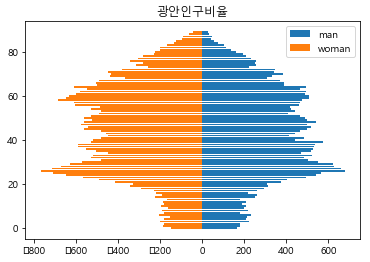

In [148]:
plt.rc('font', family='Malgun Gothic')
plt.title(city + '인구비율')
plt.barh(np.arange(len(city_man)), city_man, label='man')
plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
plt.legend()

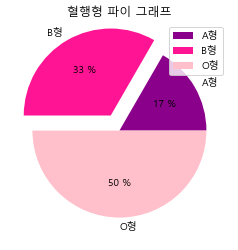

In [130]:
#p130
plt.rc('font', family='Malgun Gothic')
color = ['darkmagenta', 'deeppink', 'pink']
plt.title("혈행형 파이 그래프")
n = plt.pie([10,20,30], labels=['A형','B형','O형'], autopct='%.0f %%', colors=color, explode=(0,0.2,0))
n = plt.legend()


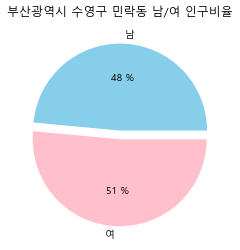

In [170]:
plt.rc('font', family='Malgun Gothic')
color = ['skyblue', 'pink']
plt.title(city + ' 남/여 인구비율')
n = plt.pie([np.sum(city_man), np.sum(city_woman)], labels=['남','여'], autopct='%d %%', colors=color, explode =(0,0.1))

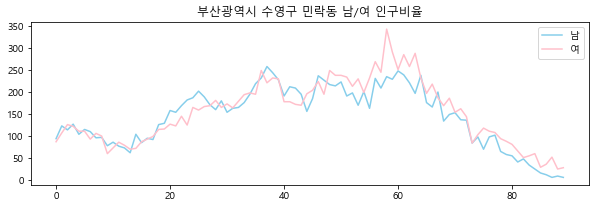

In [175]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,3))
plt.title(city + ' 남/여 인구비율')
p=plt.plot(city_man, label='남', color='skyblue')
p=plt.plot(city_woman, label='여', color='pink')
plt.legend()

In [176]:
df = pd.read_csv('gendors.csv', encoding='cp949')
df = df.replace(',','',regex=True)
max_age=100
city = '부산광역시 수영구 민락동'
man_0 = '2019년05월_남_0세'
woman_0= '2019년05월_여_0세'
columns = list(df.columns)
man_0_index = columns.index(man_0)
woman_0_index = columns.index(woman_0)
columns[man_0_index], columns[man_0_index + max_age], columns[woman_0_index], columns[woman_0_index + max_age]


('2019년05월_남_0세', '2019년05월_남_100세 이상', '2019년05월_여_0세', '2019년05월_여_100세 이상')

궁금한 동네를 입력해주세요 구서제2동


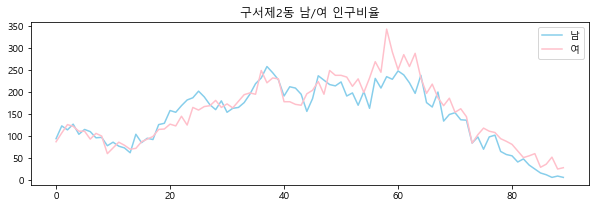

In [179]:
city = input('궁금한 동네를 입력해주세요 ')
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,3))
plt.title(city + ' 남/여 인구비율')
p=plt.plot(city_man, label='남', color='skyblue')
p=plt.plot(city_woman, label='여', color='pink')
plt.legend()


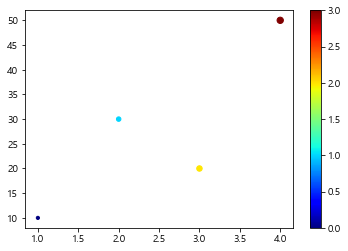

In [184]:
#p144 산점도(scatter) 산개할 산, 점점, 그림도
#p146
color=['red','green','black','gold']
color = 'blue'

n = plt.scatter([1,2,3,4],[10,30,20,50], s=[10,20,30,40], c=range(4), cmap='jet')
n = plt.colorbar()

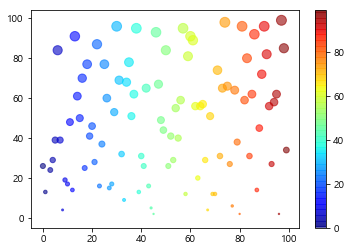

In [189]:
y=np.random.randint(0,100,size=100)
n = plt.scatter(np.arange(len(y)),y, s=y, c=range(len(y)), cmap='jet', alpha=0.6)
n = plt.colorbar()

### 그래프 정리
- plot(x) plot(x,y) 선
- hist(x) 히스토그램
- boxplot(x) 상자그림
- bar(x,y), barh(x,y) 막대그래프
- pie(x) 파이차트
- scatter(x,y) 선점도
<ul>  unordered list tag
    <ol> orderd list